# RSNA: Abnomional Trauma Detection -> Exploratory Data Analysis

**Introduction:**

The competition -> RSNA Abdominal Trauma Detection aims to enhance and improve diagnosis of traumatic injuries that take place in the abdonimal cavity. The medical image modality used to study this types of injuries are the CT scans, which have became indispensable for evaluation and diagnosis. The interpretation of these scans can be difficult and time consuming.
For this reason the competition seeks to develop solutions based on AI.

**Objective:** The objective of this notebook is to explore the data, retrieving important information in order to establish and structure a robust strategy, leading to a satisfactory resolution of the competition.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
plt.style.use("seaborn");

C:\Users\pedro\AppData\Local\Temp\ipykernel_5492\4120163455.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn");


In [3]:
data = pd.read_csv("train.csv")
data.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1


**Labels present**

* patient_id - A unique ID code for each patient.
* [bowel/extravasation]_[healthy/injury] - The two injury types with binary targets.
* [kidney/liver/spleen]_[healthy/low/high] - The three injury types with three target levels.
* any_injury - Whether the patient had any injury at all.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   patient_id             3147 non-null   int64
 1   bowel_healthy          3147 non-null   int64
 2   bowel_injury           3147 non-null   int64
 3   extravasation_healthy  3147 non-null   int64
 4   extravasation_injury   3147 non-null   int64
 5   kidney_healthy         3147 non-null   int64
 6   kidney_low             3147 non-null   int64
 7   kidney_high            3147 non-null   int64
 8   liver_healthy          3147 non-null   int64
 9   liver_low              3147 non-null   int64
 10  liver_high             3147 non-null   int64
 11  spleen_healthy         3147 non-null   int64
 12  spleen_low             3147 non-null   int64
 13  spleen_high            3147 non-null   int64
 14  any_injury             3147 non-null   int64
dtypes: int64(15)
memory usage: 368.9 KB


In [24]:
data.shape[1], data.columns

(15,
 Index(['patient_id', 'bowel_healthy', 'bowel_injury', 'extravasation_healthy',
        'extravasation_injury', 'kidney_healthy', 'kidney_low', 'kidney_high',
        'liver_healthy', 'liver_low', 'liver_high', 'spleen_healthy',
        'spleen_low', 'spleen_high', 'any_injury'],
       dtype='object'))

In [25]:
data.describe()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
count,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000
mean,32664.239593,0.979663,0.020337,0.936447,0.063553,0.942167,0.036543,0.021290,0.897998,0.082301,0.019701,0.887512,0.063235,0.049253,0.271687
std,18792.043458,0.141172,0.141172,0.243993,0.243993,0.233464,0.187666,0.144373,0.302699,0.274866,0.138994,0.316016,0.243424,0.216431,0.444900
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16355.500000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,32195.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,49302.500000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,65508.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Check if there is any missing values
data.isnull().sum()

patient_id               0
bowel_healthy            0
bowel_injury             0
extravasation_healthy    0
extravasation_injury     0
kidney_healthy           0
kidney_low               0
kidney_high              0
liver_healthy            0
liver_low                0
liver_high               0
spleen_healthy           0
spleen_low               0
spleen_high              0
any_injury               0
dtype: int64

In [27]:
binary_columns = [data.columns[i] for i in range(1,14)]
data[binary_columns] = data[binary_columns].astype(bool)
data

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,True,False,False,True,False,True,False,True,False,False,False,False,True,1
1,10005,True,False,True,False,True,False,False,True,False,False,True,False,False,0
2,10007,True,False,True,False,True,False,False,True,False,False,True,False,False,0
3,10026,True,False,True,False,True,False,False,True,False,False,True,False,False,0
4,10051,True,False,True,False,True,False,False,True,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,9951,True,False,True,False,True,False,False,True,False,False,True,False,False,0
3143,9960,True,False,True,False,True,False,False,True,False,False,True,False,False,0
3144,9961,True,False,True,False,True,False,False,True,False,False,True,False,False,0
3145,9980,True,False,True,False,True,False,False,True,False,False,False,False,True,1


In [28]:
data.describe()

,patient_id,any_injury
count,3147.000000,3147.000000
mean,32664.239593,0.271687
std,18792.043458,0.444900
min,19.000000,0.000000
25%,16355.500000,0.000000
50%,32195.000000,0.000000
75%,49302.500000,1.000000
max,65508.000000,1.000000


In [29]:
categorical_columns = [data.columns[i] for i in range(1,15)]
categorical_columns

['bowel_healthy',
 'bowel_injury',
 'extravasation_healthy',
 'extravasation_injury',
 'kidney_healthy',
 'kidney_low',
 'kidney_high',
 'liver_healthy',
 'liver_low',
 'liver_high',
 'spleen_healthy',
 'spleen_low',
 'spleen_high',
 'any_injury']

In [31]:
counts = data[categorical_columns].apply(pd.Series.value_counts)
percentages = (counts / data.shape[0]) * 100

In [39]:
counts

,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
False,64,3083,200,2947,182,3032,3080,321,2888,3085,354,2948,2992,2292
True,3083,64,2947,200,2965,115,67,2826,259,62,2793,199,155,855


In [37]:
percentages

,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
False,2.033683,97.966317,6.355259,93.644741,5.783286,96.345726,97.870988,10.200191,91.76994,98.02987,11.248808,93.676517,95.074674,72.831268
True,97.966317,2.033683,93.644741,6.355259,94.216714,3.654274,2.129012,89.799809,8.23006,1.97013,88.751192,6.323483,4.925326,27.168732


In [88]:
def show_stats(count_data, pct_data, title):
    fig = plt.figure(layout="constrained", figsize=(10, 5))
    fig.suptitle(title, fontsize=16)

    gs = fig.add_gridspec(1, 2)
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    
    num_bars = len(count_data)
    colors = [tuple(random.random() for _ in range(3)) for _ in range(num_bars)]

    count_data[title].plot(kind="bar", ax=ax1, color=colors);
    pct_data[title].plot.pie(ax=ax2, autopct="%1.2f%%",
                     explode=(0, 0.3),
                     colors=colors)
    plt.show();

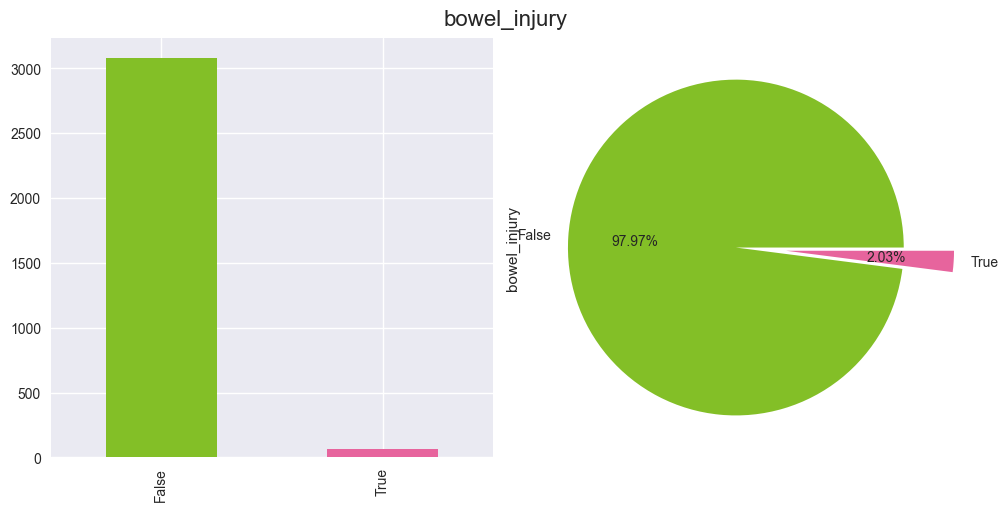

In [89]:
show_stats(counts, percentages, "bowel_injury")

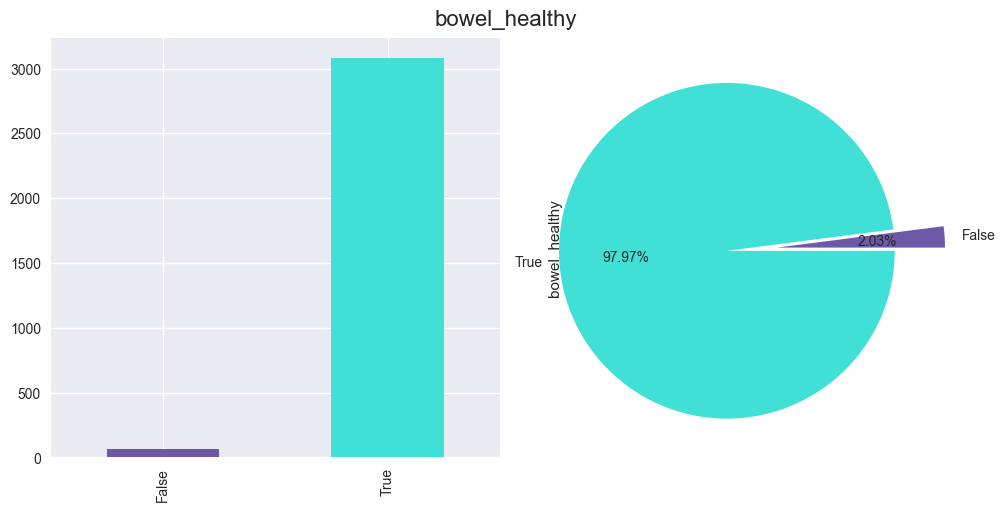

In [95]:
show_stats(counts, percentages, "bowel_healthy")

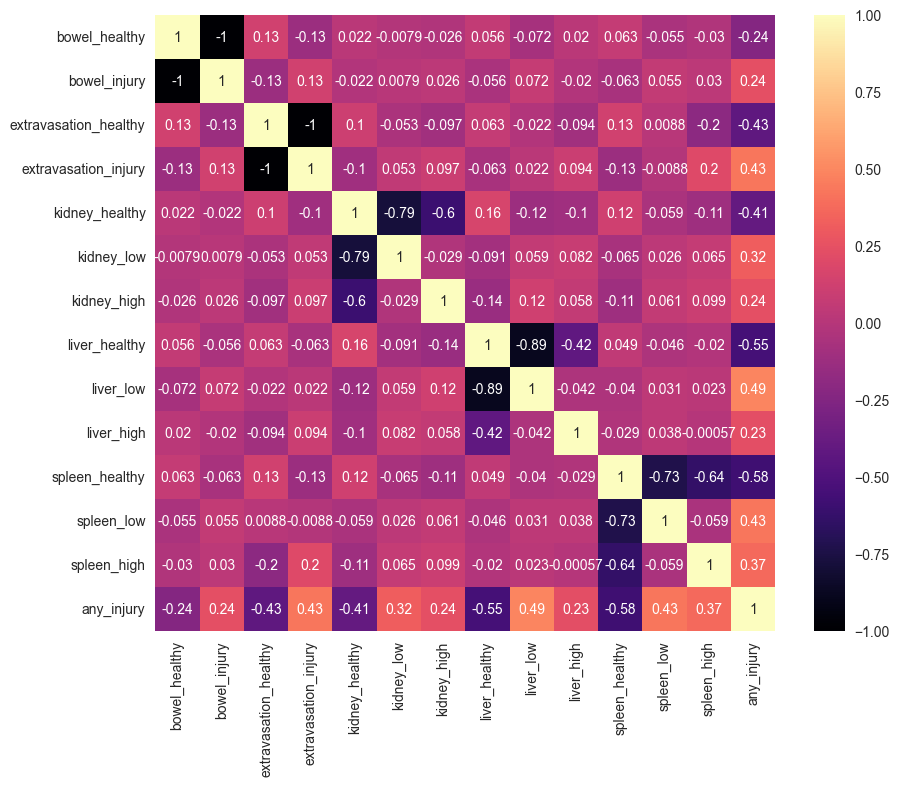

In [101]:
plt.figure(figsize = (10,8))
sns.heatmap(data.drop(["patient_id"], axis=1).corr(), annot=True, cmap="magma")
plt.show();

## Searching for extravasation injury relation with other organs

In [9]:
data.head(10)

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1
5,10065,0,1,1,0,1,0,0,1,0,0,1,0,0,1
6,10082,1,0,1,0,1,0,0,1,0,0,1,0,0,0
7,10104,1,0,1,0,1,0,0,1,0,0,1,0,0,0
8,10105,1,0,1,0,1,0,0,1,0,0,1,0,0,0
9,10124,1,0,1,0,1,0,0,1,0,0,1,0,0,0


In [10]:
categorical_columns = [data.columns[i] for i in range(1,15)]
categorical_columns

['bowel_healthy',
 'bowel_injury',
 'extravasation_healthy',
 'extravasation_injury',
 'kidney_healthy',
 'kidney_low',
 'kidney_high',
 'liver_healthy',
 'liver_low',
 'liver_high',
 'spleen_healthy',
 'spleen_low',
 'spleen_high',
 'any_injury']

#### Injury extravasation

In [31]:
injury_corr = data[['extravasation_injury', 'kidney_low', 'kidney_high', 'liver_low', 'liver_high', 'liver_low', 'liver_high','spleen_low', 'spleen_high']]

In [32]:
injury = injury_corr.loc[injury_corr['extravasation_injury'] == 1]
injury

,extravasation_injury,kidney_low,kidney_high,liver_low,liver_high,liver_low,liver_high,spleen_low,spleen_high
0,1,1,0,0,0,0,0,0,1
16,1,0,0,1,0,1,0,0,1
22,1,0,0,0,0,0,0,0,0
28,1,0,0,0,0,0,0,0,0
57,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3051,1,0,0,0,0,0,0,0,0
3060,1,0,0,0,0,0,0,0,0
3063,1,1,0,0,1,0,1,0,0
3122,1,0,0,0,0,0,0,0,0


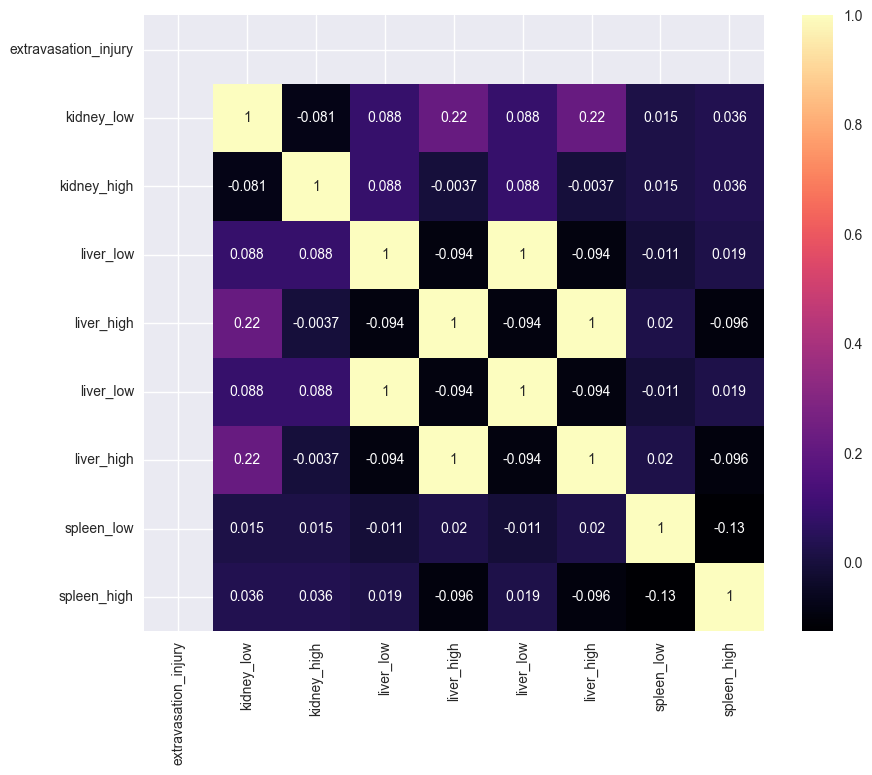

In [33]:
plt.figure(figsize = (10,8))
sns.heatmap(injury.corr(), annot=True, cmap="magma" ) 
plt.show();

#### Healthy extravasation

In [36]:
healthy_corr = data[['extravasation_healthy', 'kidney_healthy', 'liver_healthy', 'spleen_healthy']]

In [37]:
healthy = healthy_corr.loc[healthy_corr['extravasation_healthy'] == 1]
healthy

,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,0
5,1,1,1,1
...,...,...,...,...
3142,1,1,1,1
3143,1,1,1,1
3144,1,1,1,1
3145,1,1,1,0


In [39]:
len(healthy) + len(injury) == len(data)

True

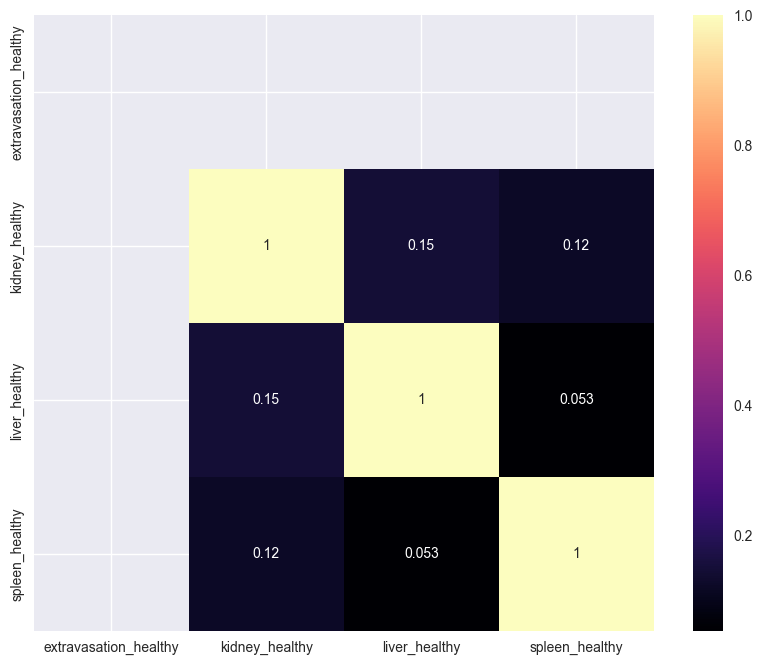

In [40]:
plt.figure(figsize = (10,8))
sns.heatmap(healthy.corr(), annot=True, cmap="magma" ) 
plt.show();

## Bowel injury/healthy exploration

In [41]:
data.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1


In [49]:
bowel_injury = data[["bowel_injury"]]
bowel_injury = bowel_injury.loc[bowel_injury["bowel_injury"] == 1]
bowel_injury

,bowel_injury
5,1
48,1
50,1
67,1
101,1
...,...
2972,1
3031,1
3038,1
3060,1


In [50]:
bowel_healthy = data[["bowel_healthy"]]
bowel_healthy = bowel_healthy.loc[bowel_healthy["bowel_healthy"] == 1]
bowel_healthy

,bowel_healthy
0,1
1,1
2,1
3,1
4,1
...,...
3142,1
3143,1
3144,1
3145,1


In [51]:
len(bowel_injury) + len(bowel_healthy) == len(data)

True

# Image level labels EDA

In [53]:
data_labels = pd.read_csv("image_level_labels.csv")
data_labels.head()

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation


In [55]:
data_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12029 entries, 0 to 12028
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       12029 non-null  int64 
 1   series_id        12029 non-null  int64 
 2   instance_number  12029 non-null  int64 
 3   injury_name      12029 non-null  object
dtypes: int64(3), object(1)
memory usage: 376.0+ KB


In [59]:
active_extravasation = data_labels.loc[data_labels["injury_name"] == "Active_Extravasation"]
active_extravasation

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation
...,...,...,...,...
12024,9632,3750,155,Active_Extravasation
12025,9632,3750,156,Active_Extravasation
12026,9632,3750,157,Active_Extravasation
12027,9632,3750,158,Active_Extravasation


In [97]:
bowel = data_labels.loc[data_labels["injury_name"] == "Bowel"]
bowel

,patient_id,series_id,instance_number,injury_name
105,10065,37324,48,Bowel
106,10065,37324,49,Bowel
107,10065,37324,50,Bowel
108,10065,37324,51,Bowel
109,10065,37324,52,Bowel
...,...,...,...,...
11987,8684,38440,147,Bowel
11988,8684,38440,148,Bowel
11989,8684,38440,149,Bowel
11990,8684,38440,150,Bowel


In [98]:
bowel = bowel.loc[bowel["patient_id"] == 10065]
bowel

,patient_id,series_id,instance_number,injury_name
105,10065,37324,48,Bowel
106,10065,37324,49,Bowel
107,10065,37324,50,Bowel
108,10065,37324,51,Bowel
109,10065,37324,52,Bowel
110,10065,37324,53,Bowel
111,10065,37324,54,Bowel
112,10065,37324,55,Bowel
113,10065,37324,56,Bowel
114,10065,37324,57,Bowel


In [72]:
pacient = active_extravasation.loc[active_extravasation["patient_id"] == 9632]
pacient

,patient_id,series_id,instance_number,injury_name
12007,9632,3750,138,Active_Extravasation
12008,9632,3750,139,Active_Extravasation
12009,9632,3750,140,Active_Extravasation
12010,9632,3750,141,Active_Extravasation
12011,9632,3750,142,Active_Extravasation
12012,9632,3750,143,Active_Extravasation
12013,9632,3750,144,Active_Extravasation
12014,9632,3750,145,Active_Extravasation
12015,9632,3750,146,Active_Extravasation
12016,9632,3750,147,Active_Extravasation


In [73]:
pacient["series_id"].tolist()[0]

3750

In [120]:
import os

def clean_image_data(patient_id, data_file):
    if os.path.isfile(data_file) == True:
        data = pd.read_csv(data_file)
        bowel = data.loc[data["injury_name"] == "Bowel"]
        active_extravasation = data.loc[data["injury_name"] == "Active_Extravasation"]
        
        data_pacient_extravasation = active_extravasation.loc[active_extravasation["patient_id"] == patient_id]
        if len(data_pacient_extravasation) > 0:
            try:
                instance_number_extravasation = data_pacient_extravasation["instance_number"].tolist()
                series_id_extravasation = data_pacient_extravasation["series_id"].tolist()[0]
                return instance_number_extravasation, series_id_extravasation, "Extravasation_injury"
            except:
                print("No records for this patient")
    
        data_pacient_bowel = bowel.loc[bowel["patient_id"] == patient_id]
        if len(data_pacient_bowel) > 0:
            try:
                instance_number_bowel = data_pacient_bowel["instance_number"].tolist()
                series_id_bowel = data_pacient_bowel["series_id"].tolist()[0]
                return instance_number_bowel, series_id_bowel, "Bowel_injury"
            except:
                print("No records for this patient")
        
    return "File selected or patient_id not valid, make sure to pass a csv file and select a pacient with any injury.."
    
    

In [130]:
x, y, _ = clean_image_data(10065, "image_level_labels.csv")

In [141]:
pacients = data_labels["patient_id"].unique().tolist()
len(pacients)

246

In [146]:
len_instances = []

for i, pacient in enumerate(pacients):
    print("Evaluating pacient: {}".format(pacient))
    x, y, z = clean_image_data(pacient, "image_level_labels.csv")
    print("Injury type: {}".format(z))
    print("Number of CT instances: {}".format(len(x)))
    print("Series of the pacient CT: {}".format(y))
    print("#--------------------------------------#")
    len_instances.append(len(x))

Evaluating pacient: 10004
Injury type: Extravasation_injury
Number of CT instances: 105
Series of the pacient CT: 21057
#--------------------------------------#
Evaluating pacient: 10065
Injury type: Bowel_injury
Number of CT instances: 23
Series of the pacient CT: 37324
#--------------------------------------#
Evaluating pacient: 10217
Injury type: Extravasation_injury
Number of CT instances: 56
Series of the pacient CT: 16066
#--------------------------------------#
Evaluating pacient: 10292
Injury type: Extravasation_injury
Number of CT instances: 7
Series of the pacient CT: 14945
#--------------------------------------#
Evaluating pacient: 10494
Injury type: Extravasation_injury
Number of CT instances: 14
Series of the pacient CT: 65369
#--------------------------------------#
Evaluating pacient: 10917
Injury type: Bowel_injury
Number of CT instances: 167
Series of the pacient CT: 30843
#--------------------------------------#
Evaluating pacient: 10929
Injury type: Bowel_injury
Num

Injury type: Extravasation_injury
Number of CT instances: 61
Series of the pacient CT: 54527
#--------------------------------------#
Evaluating pacient: 24329
Injury type: Extravasation_injury
Number of CT instances: 81
Series of the pacient CT: 5086
#--------------------------------------#
Evaluating pacient: 24439
Injury type: Extravasation_injury
Number of CT instances: 6
Series of the pacient CT: 5104
#--------------------------------------#
Evaluating pacient: 24524
Injury type: Extravasation_injury
Number of CT instances: 58
Series of the pacient CT: 40496
#--------------------------------------#
Evaluating pacient: 25289
Injury type: Extravasation_injury
Number of CT instances: 155
Series of the pacient CT: 18681
#--------------------------------------#
Evaluating pacient: 25347
Injury type: Extravasation_injury
Number of CT instances: 21
Series of the pacient CT: 25359
#--------------------------------------#
Evaluating pacient: 25353
Injury type: Extravasation_injury
Number o

Injury type: Extravasation_injury
Number of CT instances: 148
Series of the pacient CT: 50549
#--------------------------------------#
Evaluating pacient: 40754
Injury type: Extravasation_injury
Number of CT instances: 3
Series of the pacient CT: 48977
#--------------------------------------#
Evaluating pacient: 4093
Injury type: Extravasation_injury
Number of CT instances: 32
Series of the pacient CT: 5176
#--------------------------------------#
Evaluating pacient: 41007
Injury type: Extravasation_injury
Number of CT instances: 110
Series of the pacient CT: 51346
#--------------------------------------#
Evaluating pacient: 41050
Injury type: Bowel_injury
Number of CT instances: 98
Series of the pacient CT: 21228
#--------------------------------------#
Evaluating pacient: 41184
Injury type: Extravasation_injury
Number of CT instances: 27
Series of the pacient CT: 39337
#--------------------------------------#
Evaluating pacient: 41306
Injury type: Extravasation_injury
Number of CT in

Injury type: Bowel_injury
Number of CT instances: 350
Series of the pacient CT: 38658
#--------------------------------------#
Evaluating pacient: 53832
Injury type: Extravasation_injury
Number of CT instances: 27
Series of the pacient CT: 12693
#--------------------------------------#
Evaluating pacient: 53908
Injury type: Extravasation_injury
Number of CT instances: 55
Series of the pacient CT: 15610
#--------------------------------------#
Evaluating pacient: 54062
Injury type: Extravasation_injury
Number of CT instances: 6
Series of the pacient CT: 10709
#--------------------------------------#
Evaluating pacient: 54183
Injury type: Bowel_injury
Number of CT instances: 172
Series of the pacient CT: 33526
#--------------------------------------#
Evaluating pacient: 5429
Injury type: Extravasation_injury
Number of CT instances: 16
Series of the pacient CT: 17447
#--------------------------------------#
Evaluating pacient: 54361
Injury type: Extravasation_injury
Number of CT instances

Injury type: Extravasation_injury
Number of CT instances: 8
Series of the pacient CT: 35443
#--------------------------------------#
Evaluating pacient: 820
Injury type: Extravasation_injury
Number of CT instances: 9
Series of the pacient CT: 11921
#--------------------------------------#
Evaluating pacient: 8263
Injury type: Extravasation_injury
Number of CT instances: 4
Series of the pacient CT: 30011
#--------------------------------------#
Evaluating pacient: 8684
Injury type: Bowel_injury
Number of CT instances: 41
Series of the pacient CT: 38440
#--------------------------------------#
Evaluating pacient: 9528
Injury type: Extravasation_injury
Number of CT instances: 15
Series of the pacient CT: 1989
#--------------------------------------#
Evaluating pacient: 9632
Injury type: Extravasation_injury
Number of CT instances: 22
Series of the pacient CT: 3750
#--------------------------------------#


In [149]:
len(len_instances), len(pacients)

(246, 246)

In [168]:
pacientes = map(str, pacients)
pacientes = list(pacientes)

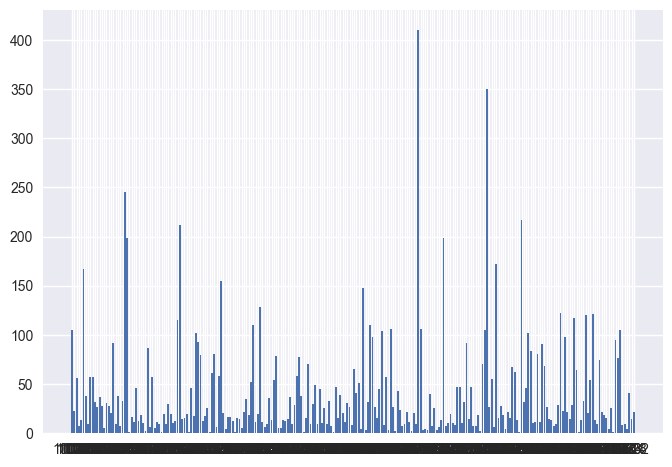

In [167]:
plt.bar(pacientes, len_instances)
plt.show();

2292 855


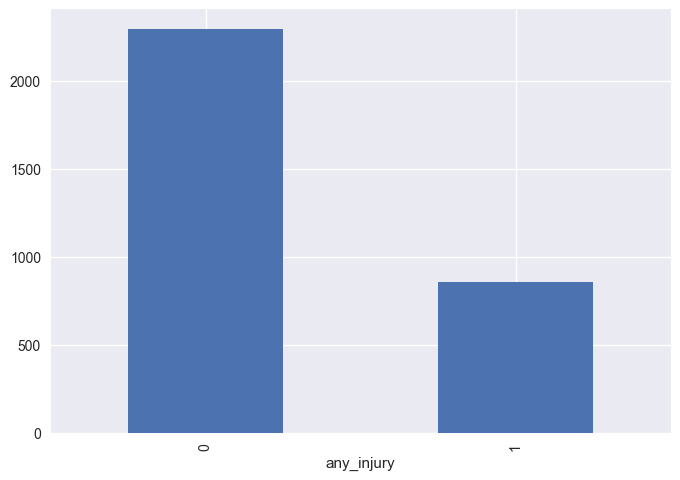

In [180]:
fig, ax = plt.subplots()
data['any_injury'].value_counts().plot(ax=ax, kind='bar')
print(len(data.loc[data["any_injury"] == 0]), len(data.loc[data["any_injury"] == 1]))
plt.show()